# Visual story telling part 2: Capital Metro data
The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

* timestamp: the beginning of the 15-minute window for that row of data
* boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
* alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
* day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
* temperature: temperature at that time in degrees F
* hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
* month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

Import all required packages

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Upload and clean the dataset by removing NA values

In [37]:
df = pd.read_csv('Data/capmetro_UT.csv')
df.isna().sum()
print('Before cleaning df count =',df.shape[0])
df = df.dropna()
df.isna().sum()
print('After cleaning df count =',df.shape[0])
df

Before cleaning df count = 5824
After cleaning df count = 5824


,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend
...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday


Convert the timestamp column into a datetime column

Add a column 'Weekend' to indicate if it was Weekend or no

Add a column 'Ridership' to calculate the total boarding + alightning of each record

Add a column 'day_of_month' to calculate the day of the month

Add a column 'week_of_year' to calculate the week of the year

In [38]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Weekend'] = df['day_of_week'].isin(['Sat','Sun']).astype(int)
df['Ridership'] = df['boarding'] + df['alighting']
# df[['date','time']] = df['timestamp'].str.split(' ',expand = True)
df['day_of_month'] = df['timestamp'].dt.day
df['week_of_year'] =df['timestamp'].dt.isocalendar().week
df

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,Weekend,Ridership,day_of_month,week_of_year
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,1,1,1,35
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,1,3,1,35
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend,1,7,1,35
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend,1,7,1,35
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend,1,6,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday,0,72,30,48
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday,0,43,30,48
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday,0,49,30,48
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday,0,40,30,48


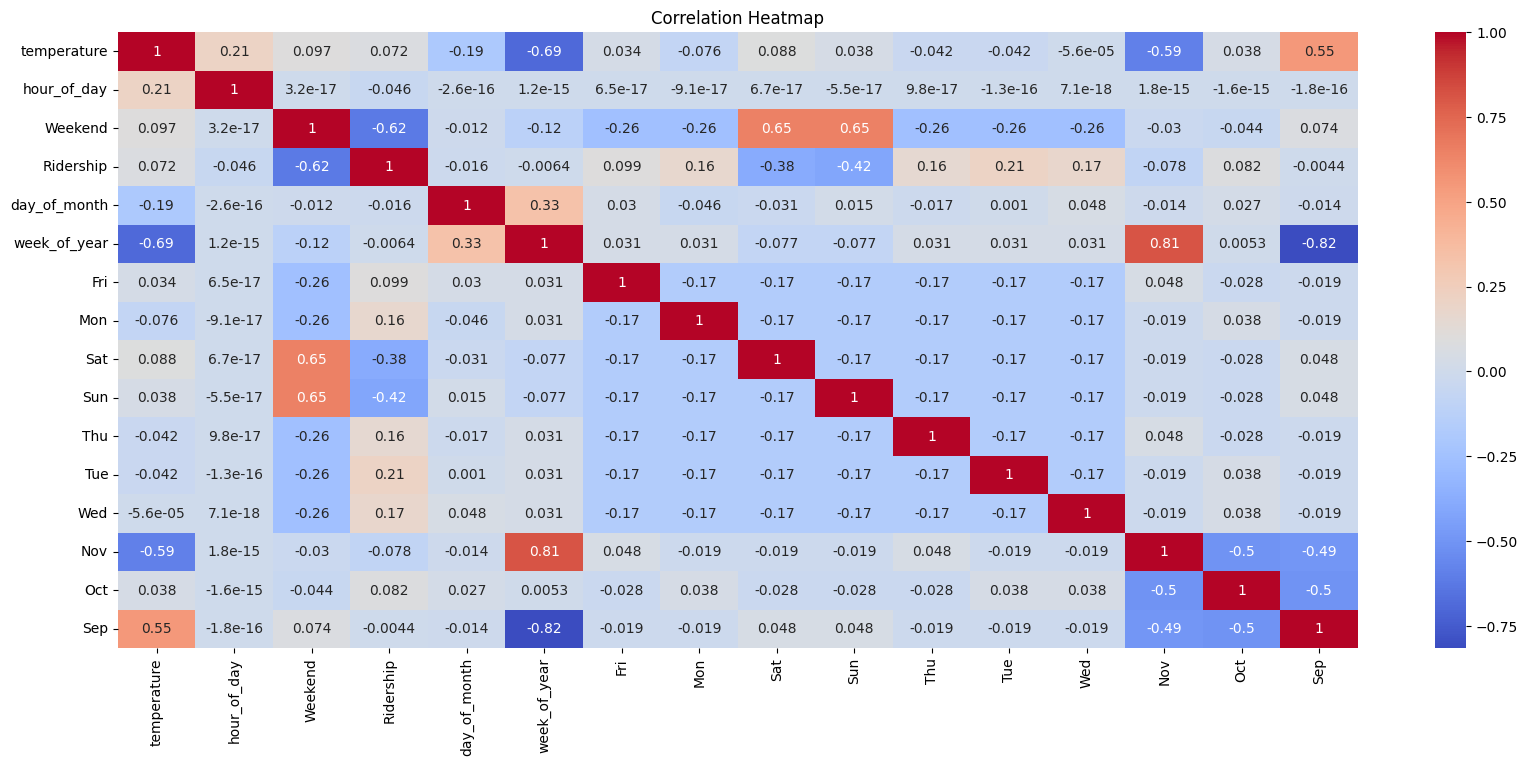

In [39]:
dw_df = pd.get_dummies(df['day_of_week'])
mt_df = pd.get_dummies(df['month'])
df_f = pd.concat([df, dw_df,mt_df], axis=1)
columns_to_drop = ['timestamp','boarding','day_of_week','alighting','weekend','month']
correlation_matrix = (df_f.drop(columns=columns_to_drop)).corr()

plt.figure(figsize=(20, 8))  # Adjust the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')#, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

Ridership has a positive correlation with all the weekdays and negative corelation with weekends, as expected as most college/university student would most likely be taking their days off to complete assignments

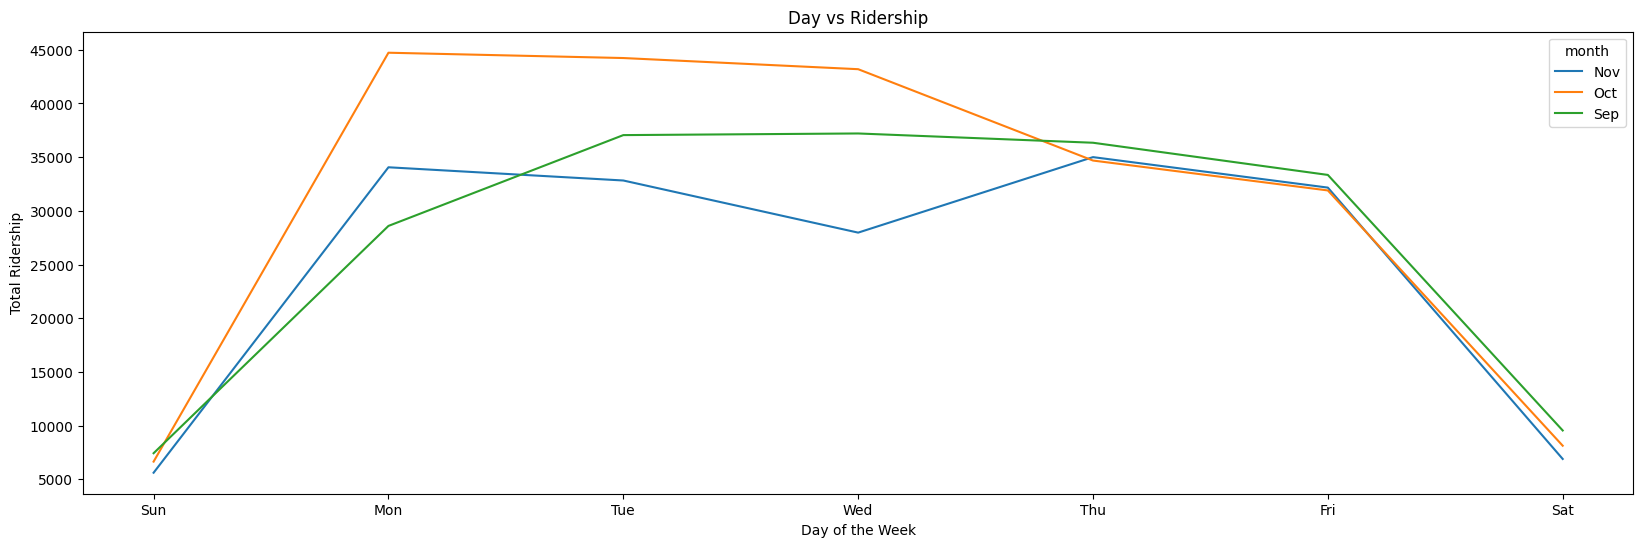

In [40]:
day_of_week = df.groupby(['month','day_of_week'])['Ridership'].sum()  
day_of_week_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
day_of_week = day_of_week.reset_index()
day_of_week = day_of_week.set_index('day_of_week')
# day_of_week = day_of_week.reindex(day_of_week_order)
day_of_week = day_of_week.loc[day_of_week_order]
day_of_week

plt.figure(figsize=(20, 6))
sns.lineplot(x=day_of_week.index, y=day_of_week['Ridership'], hue= day_of_week['month'])

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Total Ridership")
plt.title("Day vs Ridership")

plt.show()


As from the correlation matrix, we can see that ridership is much higher on weekdays as compared to the weekdays. This is the case for all three months in consideration

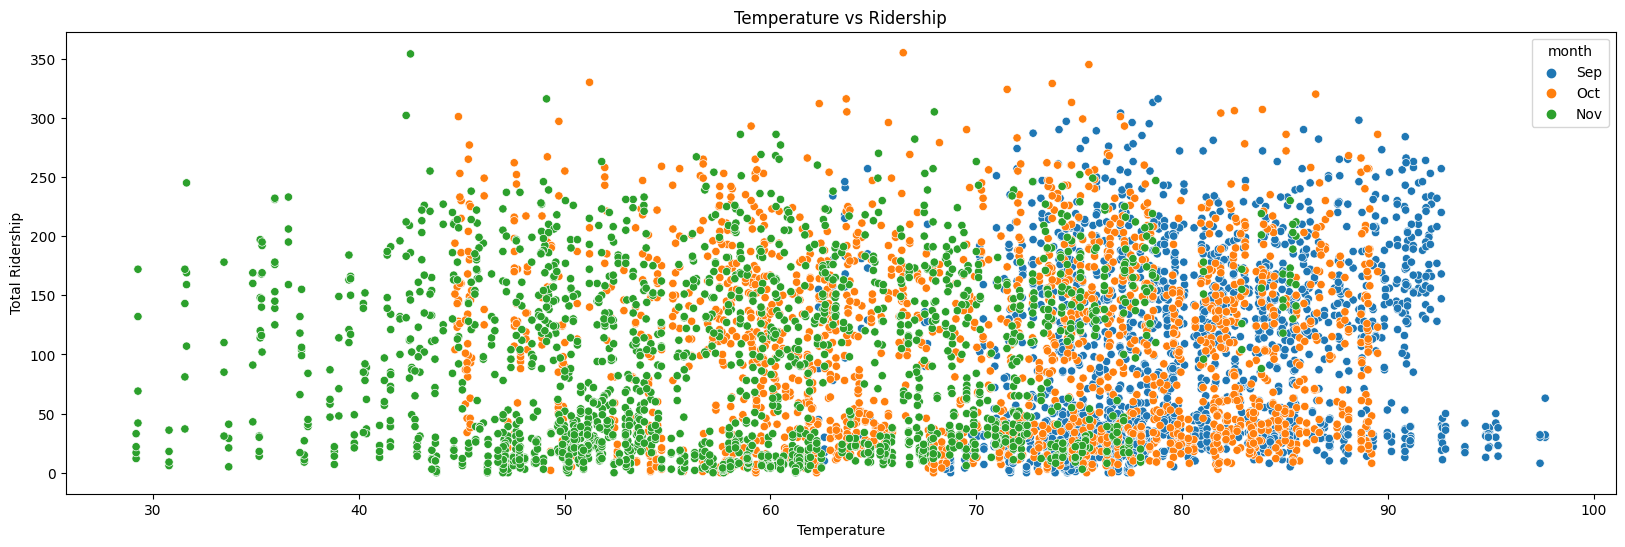

In [41]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=df['temperature'], y=df['Ridership'], hue= df['month'])

# Add labels and title
plt.xlabel("Temperature")
plt.ylabel("Total Ridership")
plt.title("Temperature vs Ridership")

plt.show()

We can see that the overall temperature drops from September to November, but that doest seem to show a very visually significant relationship with the ridership

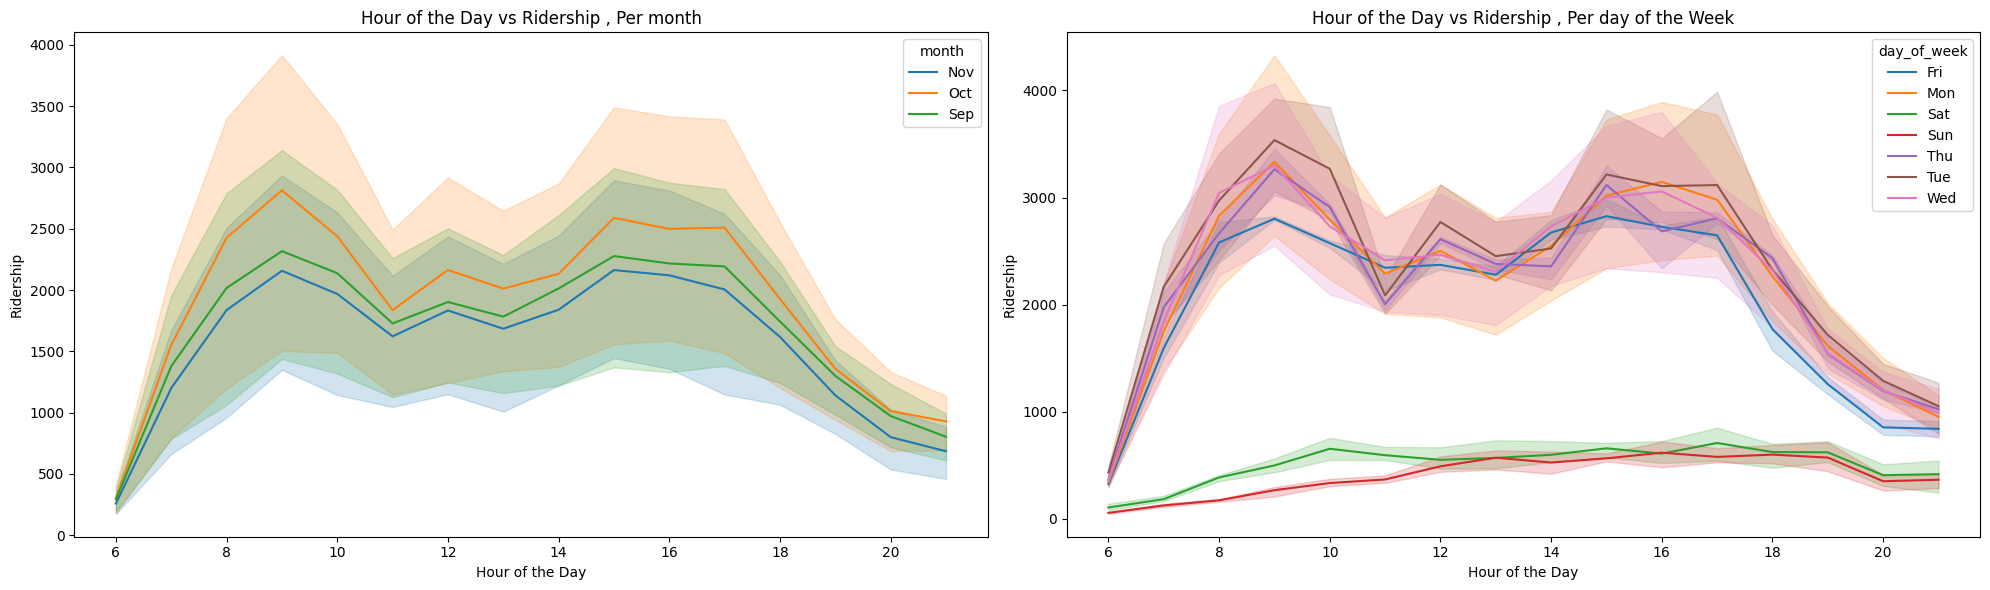

In [42]:
hours_of_day = df.groupby(['month','day_of_week','hour_of_day'])['Ridership'].sum()  
# day_of_week_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
hours_of_day = hours_of_day.reset_index()
hours_of_day = hours_of_day.set_index('hour_of_day')
hours_of_day



fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x=hours_of_day.index, y=hours_of_day['Ridership'], hue= hours_of_day['month'], ax= axes[0])
# Add labels and title
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Ridership")
axes[0].set_title("Hour of the Day vs Ridership , Per month")

sns.lineplot(x=hours_of_day.index, y=hours_of_day['Ridership'], hue= hours_of_day['day_of_week'], ax= axes[1])
# Add labels and title
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Ridership")
axes[1].set_title("Hour of the Day vs Ridership , Per day of the Week")

plt.tight_layout()
plt.show()

Most people weem to be riding/using the bus service early in the mornings, betweek 8-10 AM and in the evenings between 3-5 PM. This is consistent over the monthly totals and week day totals. On weekends however, there is a drop in total ridership overall but seems to be relatively steady throughout the day

Text(0.5, 1.0, 'Day of the Week vs Total Ridership')

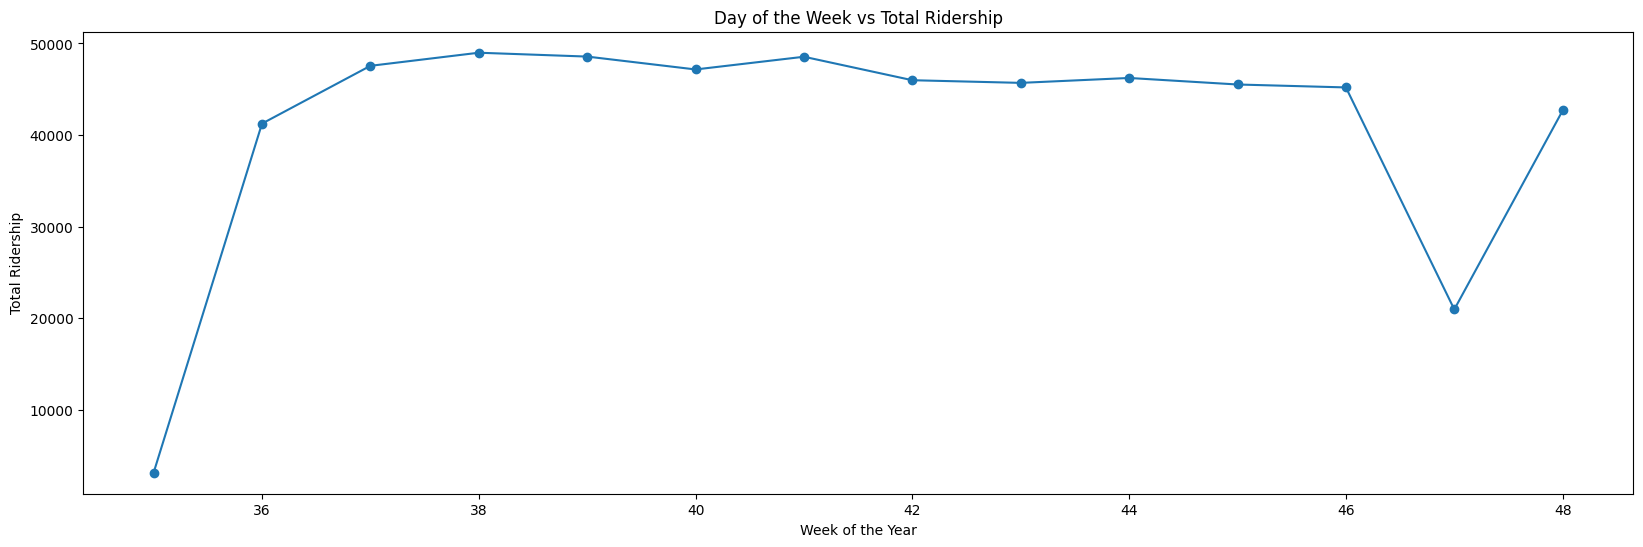

In [43]:
plt.figure(figsize=(20, 6))
week_of_year = df.groupby('week_of_year')['Ridership'].sum()
week_of_year = week_of_year.reset_index().set_index('week_of_year')
week_of_year
# sns.lineplot(x=week_of_year.index, y=week_of_year['Ridership'])
plt.plot(week_of_year.index, week_of_year['Ridership'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Week of the Year")
plt.ylabel("Total Ridership")
plt.title("Day of the Week vs Total Ridership")

Sharp dip during week 47, this should correspond to the Thanksgiving week/Break. Most of the students might have gone back home, and the general population also might be chosing to sit home with their families on this day

Week 35 is low as only 1 day in the week ha been considered